# Analisis Performa Metode Naive Bayes dan Artificial Neural Networks dalam Deteksi Dini Kanker Serviks

Kelompok ???
- Muhammad Syaifudin Zuhri
- Adzin Naufal
- ???
- [ACHMAD RIDHO FA'IZ](https://rhindottire.github.io/Data-Mining/intro.html) (230411100197)

## Introduction

### Naive Bayes

![Naive Bayes](KK/img/naive-bayes.png)

**Naive Bayes** adalah algoritma klasifikasi probabilistik yang didasarkan pada `teorema Bayes` dengan asumsi bahwa setiap fitur dalam data saling independen satu sama lain, diberikan kelas tertentu. Asumsi independensi ini, meskipun sering kali tidak realistis, membuat algoritma ini sederhana, cepat, dan efektif untuk berbagai aplikasi, terutama dalam klasifikasi teks dan diagnosis medis.

- **Definisi**: Naive Bayes adalah algoritma klasifikasi berbasis probabilitas yang menggunakan teorema Bayes dengan asumsi bahwa fitur-fitur dalam data saling independen. Meskipun asumsi ini sederhana, algoritma ini sering kali efektif untuk berbagai tugas klasifikasi.
- **Cara Kerja**: Algoritma ini menghitung probabilitas setiap kelas berdasarkan fitur-fitur yang diberikan, lalu memilih kelas dengan probabilitas tertinggi. Ini dilakukan dengan menggabungkan probabilitas prior (berdasarkan frekuensi kelas) dan likelihood (probabilitas fitur diberikan kelas).
    - **Langkah 1**: Hitung probabilitas awal (prior) untuk setiap kelas, misalnya, persentase kasus biopsi positif (1) dan negatif (0).
    - **Langkah 2**: Hitung probabilitas fitur (likelihood) untuk setiap kelas, seperti probabilitas usia "Muda" pada kasus biopsi positif.
    - **Langkah 3**: Kombinasikan prior dan likelihood untuk menghitung probabilitas posterior, lalu pilih kelas dengan nilai tertinggi.
    - **Langkah 4**: Untuk data baru, gunakan probabilitas ini untuk memprediksi kelas.
- **Aplikasi**: Digunakan dalam klasifikasi teks (misalnya, filter spam email), analisis sentimen, dan diagnosis medis, seperti memprediksi hasil biopsi berdasarkan data kesehatan.
- **Kelebihan dan Kekurangan**: Naive Bayes cepat dan efisien untuk data berdimensi tinggi, tetapi asumsi independensi fitur dapat membatasi akurasi jika fitur-fitur saling berkorelasi.

#### Dasar Matematis: Teorema Bayes

$$
P(C_k | x) = \frac{P(C_k) \cdot P(x | C_k)}{P(x)}
$$

Di mana:
- $ C_k $: Kelas ke-$ k $ (misalnya, Biopsy=1 atau Biopsy=0).
- $ x $: Vektor fitur (misalnya, Age, Number of sexual partners, dll.).
- $ P(C_k | x) $: Probabilitas posterior, yaitu probabilitas kelas $ C_k $ diberikan fitur $ x $.
- $ P(C_k) $: Probabilitas prior, yaitu probabilitas kelas $ C_k $ sebelum melihat data.
- $ P(x | C_k) $: Probabilitas likelihood, yaitu probabilitas fitur $ x $ diberikan kelas $ C_k $.
- $ P(x) $: Probabilitas evidence, yaitu probabilitas fitur $ x $ secara keseluruhan.

Karena $ P(x) $ konstan untuk semua kelas, kita dapat menyederhanakan perbandingan probabilitas posterior menjadi:

$$
\hat{y} = \arg\max_{k} P(C_k) \cdot P(x | C_k)
$$

#### Asumsi Independensi

Asumsi utama Naive Bayes adalah bahwa fitur-fitur saling independen diberikan kelas. Dengan demikian, likelihood dapat dihitung sebagai:

$$
P(x | C_k) = \prod_{i=1}^{n} P(x_i | C_k)
$$

Di mana:
- $ x_i $: Fitur ke-$ i $.
- $ n $: Jumlah fitur.
- $ P(x_i | C_k) $: Probabilitas fitur ke-$ i $ diberikan kelas $ C_k $.

Untuk menghindari underflow (karena perkalian banyak probabilitas kecil dapat menghasilkan nilai yang sangat kecil), sering kali digunakan logaritma:

$$
\log P(x | C_k) = \sum_{i=1}^{n} \log P(x_i | C_k)
$$

#### Perhitungan Probabilitas

- **Prior Probability ($ P(C_k) $)**: Dihitung sebagai frekuensi relatif kelas dalam data pelatihan. Misalnya, dalam file Anda:
  - $ P(\text{Biopsy=1}) = 0.125 $ (12.5% kasus positif).
  - $ P(\text{Biopsy=0}) = 0.875 $ (87.5% kasus negatif).
- **Likelihood ($ P(x_i | C_k) $)**: Tergantung pada jenis fitur:
  - **Fitur Kategorikal**: Dihitung sebagai frekuensi relatif. Misalnya, dalam file Anda:
    - $ P(\text{Age='Muda'} | \text{Biopsy=1}) = 0.25 $.
    - $ P(\text{Age='Muda'} | \text{Biopsy=0}) = 0.3 $.
  - **Fitur Kontinu**: Sering diasumsikan mengikuti distribusi Gaussian:

    $$
    P(x_i | C_k) = \frac{1}{\sqrt{2\pi \sigma_{k,i}^2}} \exp\left( -\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2} \right)
    $$

    Di mana $ \mu_{k,i} $ adalah rata-rata dan $ \sigma_{k,i} $ adalah standar deviasi fitur $ i $ dalam kelas $ k $. Dalam file Anda, fitur numerik diubah menjadi kategorikal, sehingga perhitungan Gaussian tidak digunakan.

#### Penanganan Probabilitas Nol

Jika sebuah fitur tidak muncul dalam data pelatihan untuk suatu kelas, probabilitasnya akan menjadi nol, yang dapat menyebabkan $ P(x | C_k) = 0 $. Untuk mengatasi ini, digunakan teknik **smoothing**, seperti **Laplace smoothing**:

$$
P(x_i | C_k) = \frac{\text{count}(x_i, C_k) + 1}{\text{total count}(C_k) + \text{jumlah kategori}}
$$

Ini memastikan bahwa tidak ada probabilitas yang bernilai nol.

#### Advantages and Disadvantages

**Kelebihan**:
- Cepat dan efisien untuk data berdimensi tinggi.
- Mudah diimplementasikan dan diinterpretasikan.
- Berkinerja baik pada data kategorikal.
- Membutuhkan sedikit data pelatihan dibandingkan model kompleks.

**Kekurangan**:
- Asumsi independensi fitur sering kali tidak realistis, yang dapat menurunkan akurasi jika fitur berkorelasi.
- Dapat dikalahkan oleh model seperti regresi logistik atau ANN dalam kasus kompleks [Naive Bayes Classifier - Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).
- Memerlukan penanganan probabilitas nol dengan teknik seperti Laplace smoothing.
- **Likelihood**: Probabilitas fitur diberikan kelas.

#### Naive Bayes Variants and App

Naive Bayes memiliki beberapa varian yang disesuaikan dengan jenis data:
- **Multinomial Naive Bayes**: Digunakan untuk data diskret, seperti jumlah kemunculan kata dalam klasifikasi teks. Cocok untuk fitur dengan frekuensi atau hitungan.
- **Bernoulli Naive Bayes**: Digunakan untuk data biner (hadir/tidak hadir), seperti keberadaan kata dalam dokumen.
- **Gaussian Naive Bayes**: Digunakan untuk data kontinu dengan asumsi distribusi Gaussian.

**Konsep Terkait**:
- **Teorema Bayes**: Dasar matematis untuk menghitung probabilitas bersyarat.
- **Probabilitas Bersyarat**: Probabilitas suatu peristiwa diberikan peristiwa lain telah terjadi.
- **Asumsi Independensi**: Asumsi bahwa fitur tidak saling memengaruhi, yang membuat Naive Bayes sederhana.
- **Smoothing**: Teknik seperti Laplace smoothing untuk menghindari probabilitas nol.
- **Prior dan Posterior**: Probabilitas sebelum dan setelah melihat data.

Naive Bayes sering digunakan dalam:
- **Filter Spam**: Mengklasifikasikan email sebagai spam atau bukan berdasarkan kata-kata yang ada [Naive Bayes Classifier Explained](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/).
- **Analisis Sentimen**: Menentukan apakah ulasan positif atau negatif berdasarkan kata-kata [Performing Sentiment Analysis](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/).
- **Diagnosis Medis**: Memprediksi penyakit, seperti dalam file Anda untuk hasil biopsi [Naïve Bayes Algorithm](https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html).
- **Klasifikasi Dokumen**: Mengkategorikan dokumen ke dalam topik tertentu [Naive Bayes Classifier](https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier).

#### **Key Citations**:

- [Naive Bayes Classifiers - GeeksforGeeks](https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/)
- [Naive Bayes Classifier - Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
- [Naive Bayes Classifier Explained With Practical Problems](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)
- [What Are Naïve Bayes Classifiers? | IBM](https://www.ibm.com/think/topics/naive-bayes)
- [Naive Bayes Classifier in Machine Learning - Javatpoint](https://www.javatpoint.com/machine-learning-naive-bayes-classifier)
- [Naive Bayes Classifier | Simplilearn](https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier)
- [Naïve Bayes Algorithm: Everything You Need to Know](https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html)
- [Naive Bayes Algorithm in ML: Simplifying Classification](https://www.turing.com/kb/an-introduction-to-naive-bayes-algorithm-for-beginners)
- [Naive Bayes Classifier Tutorial: with Python Scikit-learn](https://www.datacamp.com/tutorial/naive-bayes-scikit-learn)
- [A Simple Explanation of Naive Bayes Classification](https://stackoverflow.com/questions/10059594/a-simple-explanation-of-naive-bayes-classification)

### Artificial Neural Network

![Artificial Neural Network (ANN)](KK/img/ANN.png)

#### Basic Concept

**Artificial Neural Network** (ANN) adalah model komputasi yang terinspirasi dari struktur dan fungsi jaringan saraf biologis, seperti yang ada pada otak manusia. ANN terdiri dari sekumpulan `node` (neuron) yang saling terhubung dan disusun dalam lapisan, yaitu lapisan input, lapisan tersembunyi (hidden layer), dan lapisan output. Setiap neuron menerima input, mengolahnya dengan bobot (weight) dan bias, lalu menerapkan fungsi aktivasi untuk menghasilkan output. ANN digunakan untuk memodelkan pola-pola kompleks dalam data, seperti dalam klasifikasi, regresi, atau pengenalan pola, dan sering diterapkan dalam bidang seperti pengenalan gambar, pemrosesan bahasa alami (NLP), dan diagnosis medis.

#### Forward and Backpropagation Process

##### Forward Propagation

Forward propagation adalah langkah pertama dalam menggunakan ANN untuk membuat prediksi, Data masukan dilewatkan melalui jaringan untuk menghasilkan prediksi, menggunakan bobot dan fungsi aktivasi seperti sigmoid. Proses ini melibatkan:
- Setiap neuron dalam lapisan tersembunyi menghitung outputnya dengan rumus:

  $$
  \text{output} = \sigma\left( \sum_{i} w_i \cdot x_i + b \right)
  $$

  Di mana:
  - $ w_i $ adalah bobot untuk input ke-i.
  - $ x_i $ adalah nilai input ke-i.
  - $ b $ adalah bias.
  - $ \sigma $ adalah fungsi aktivasi, dalam kasus ini kemungkinan sigmoid, karena output H1 dan H2 mendekati 0 atau 1, dengan rumus:

    $$
    \sigma(z) = \frac{1}{1 + e^{-z}}
    $$

- Output dari lapisan tersembunyi kemudian digunakan sebagai input untuk lapisan output, menghasilkan prediksi akhir (Prediksi_Final).

Dalam file Anda, contohnya untuk baris pertama data (Age=18, Number of sexual partners=4, dll.), output H1 adalah 0.9999995477 dan H2 adalah 0.9999999327, yang kemudian menghasilkan Prediksi_Final = 0.4240051204.

##### Backpropagation

Backpropagation adalah algoritma untuk melatih ANN dengan menyesuaikan bobot dan bias agar prediksi menjadi lebih akurat, Kesalahan prediksi dihitung (misalnya, dengan MSE), lalu gradien dihitung untuk menyesuaikan bobot, menggunakan learning rate untuk mengontrol perubahan.  
Langkah-langkahnya adalah:
- **Forward Pass**: Hitung output jaringan untuk input yang diberikan.
- **Hitung Loss**: Bandingkan output prediksi dengan nilai target (misalnya, Biopsy) untuk menghitung kesalahan, loss dihitung menggunakan Mean Squared Error (MSE):

   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Di mana $ y_i $ adalah nilai target, dan $ \hat{y}_i $ adalah prediksi. Contoh, MSE untuk baris pertama adalah 0.0898901711.
- **Backward Pass**: Hitung gradien (turunan) dari loss terhadap setiap bobot dan bias menggunakan aturan rantai (chain rule). Gradien ini menunjukkan seberapa besar pengaruh setiap bobot terhadap loss, gradien dihitung untuk lapisan output (Gradien_Output) dan lapisan tersembunyi (Gradien_H1, Gradien_H2), misalnya Gradien_Output = -0.1035525565 untuk baris pertama.
- **Update Bobot**: Sesuaikan bobot dan bias menggunakan gradien dan learning rate:

   $$
   w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial \text{loss}}{\partial w}
   $$

   Di mana $ \eta $ adalah learning rate, Anda bernilai 0.5. Pembaruan ini terlihat dalam perbandingan "Parameter Awal" dan "Parameter Baru", misalnya bias untuk H1 berubah dari 3.4999952702 menjadi 3.9999952702.

#### Struktur dan Komponen ANN

- **Lapisan Input**: Menerima data masukan, dalam kasus ini 17 fitur seperti Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, dan lain-lain.
- **Lapisan Tersembunyi**: Dalam file Anda, ada 2 neuron tersembunyi (H1 dan H2), yang memproses data dari lapisan input untuk menghasilkan representasi yang lebih kompleks.
- **Lapisan Output**: Menghasilkan prediksi akhir, dalam hal ini untuk variabel target Biopsy (0 atau 1).

Setiap koneksi antara neuron memiliki bobot, yang menentukan kekuatan hubungan, dan setiap neuron memiliki bias untuk menggeser nilai output. Dalam file, bobot awal dan bobot baru setelah pelatihan tercatat, misalnya bobot input ke H1 berubah dari [0.2999634, 0.4299965, ...] menjadi [0.2999633736, 0.4299965073, ...], menunjukkan pembaruan melalui pelatihan.

#### Parameter dan Hasil Pelatihan

- **Learning Rate**: 0.5, digunakan untuk mengontrol seberapa besar bobot diperbarui.
- **Parameter Awal**: Bobot dan bias awal untuk koneksi input ke H1, H2, dan dari tersembunyi ke output, misalnya bobot input->H1: w1=0.2999634, w2=0.4299965, dll.
- **Parameter Baru**: Bobot dan bias setelah pelatihan, menunjukkan pembaruan berdasarkan gradien, misalnya bobot input->H1: w1_new=0.2999633736, dll.
- **Hasil**: Akurasi pelatihan mencapai 100%, dengan semua prediksi (Prediksi) sesuai dengan nilai target (Biopsy), seperti terlihat pada kolom "Benar" yang menunjukkan "Benar" untuk beberapa baris.

#### Advantages and Disadvantages

ANN digunakan dalam berbagai bidang, termasuk:
- **Pengenalan Gambar**: Klasifikasi gambar, deteksi objek, seperti yang dijelaskan di [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap2.html).
- **Natural Language Processing (NLP)**: Analisis sentimen, penerjemahan mesin, seperti yang disebutkan di [A Comprehensive Guide to the Backpropagation Algorithm in Neural Networks](https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide).
- **Prediksi Time Series**: Peramalan harga saham, cuaca, seperti yang dijelaskan di [Understanding Backpropagation | Towards Data Science](https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0/).
- **Diagnosis Medis**: Prediksi penyakit berdasarkan data pasien, seperti dalam file Anda yang mungkin terkait dengan skrining kanker serviks, seperti yang disebutkan di [How Does Backpropagation in a Neural Network Work? | Built In](https://builtin.com/machine-learning/backpropagation-neural-network).

Kelebihan ANN meliputi:
- Dapat memodelkan hubungan non-linear yang kompleks, seperti yang dijelaskan di [Backpropagation - Wikipedia](https://en.wikipedia.org/wiki/Backpropagation).
- Mampu belajar dari data dalam jumlah besar, seperti yang disebutkan di [Back Propagation in Neural Network: Machine Learning Algorithm](https://www.guru99.com/backpropogation-neural-network.html).
- Dapat digeneralisasikan pada data baru, meskipun rentan terhadap overfitting jika tidak diregulasi dengan baik, seperti yang dijelaskan di [Neural Networks: Training using backpropagation | Machine Learning | Google for Developers](https://developers.google.com/machine-learning/crash-course/neural-networks/backpropagation).

Kekurangan ANN meliputi:
- Memerlukan banyak data untuk pelatihan, seperti yang disebutkan di [What is Backpropagation? | IBM](https://www.ibm.com/think/topics/backpropagation).
- Rentan terhadap overfitting jika tidak diregulasi, seperti yang dijelaskan di [A Step by Step Backpropagation Example | Matt Mazur](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/).
- Interpretabilitas rendah, sulit untuk menjelaskan bagaimana model membuat keputusan, seperti yang disebutkan di [Backpropagation in Neural Network - GeeksforGeeks](https://www.geeksforgeeks.org/machine-learning/backpropagation-in-neural-network/).

#### Key Citations

- [Neural Networks and Deep Learning explanation](http://neuralnetworksanddeeplearning.com/chap2.html)
- [Backpropagation detailed Wikipedia page](https://en.wikipedia.org/wiki/Backpropagation)
- [Comprehensive Backpropagation Guide in Neural Networks](https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide)
- [Backpropagation in Neural Networks explanation](https://builtin.com/machine-learning/backpropagation-neural-network)
- [Backpropagation in Neural Network tutorial](https://www.geeksforgeeks.org/machine-learning/backpropagation-in-neural-network/)
- [Backpropagation machine learning technique](https://www.ibm.com/think/topics/backpropagation)
- [Neural Networks Training with Backpropagation](https://developers.google.com/machine-learning/crash-course/neural-networks/backpropagation)
- [Back Propagation in Neural Network guide](https://www.guru99.com/backpropogation-neural-network.html)
- [Step by Step Backpropagation Example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
- [Understanding Backpropagation detailed article](https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0/)

## Manual Calculation

### Naive Bayes

```python
import os, subprocess
file_path = os.path.abspath('KK/resource/naive-bayes.xlsx')
try:
    subprocess.run(['start', '', file_path], shell=True)
except Exception as e:
    print("Something went wrong:", e)
```

#### 1. Data Mentah (Raw Data)

File berisi tabel dengan data numerik yang mencakup berbagai atribut kesehatan dan demografis dari individu.  
Kolom-kolom yang ada adalah:

- **Age**: Usia individu (contoh: 18, 15, 34).
- **Number of sexual partners**: Jumlah pasangan seksual (contoh: 4, 1, 5).
- **First sexual intercourse**: Usia saat pertama kali berhubungan seksual (contoh: 15, 14, 17).
- **Num of pregnancies**: Jumlah kehamilan (contoh: 1, 4, 6).
- **Smokes**: Apakah individu merokok (1 = ya, 0 = tidak).
- **Smokes (years)**: Lama merokok dalam tahun (contoh: 37, 1.27).
- **Smokes (packs/year)**: Jumlah bungkus rokok per tahun (contoh: 37, 2.8).
- **Hormonal Contraceptives**: Penggunaan kontrasepsi hormonal (1 = ya, 0 = tidak).
- **Hormonal Contraceptives (years)**: Lama penggunaan kontrasepsi hormonal dalam tahun (contoh: 3, 15).
- **IUD**: Penggunaan alat kontrasepsi dalam rahim (1 = ya, 0 = tidak).
- **IUD (years)**: Lama penggunaan IUD dalam tahun (contoh: 7).
- **STDs**: Apakah individu memiliki penyakit menular seksual (1 = ya, 0 = tidak).
- **STDs (number)**: Jumlah penyakit menular seksual yang dimiliki.
- **STDs: Number of diagnosis**: Jumlah diagnosis penyakit menular seksual.
- **Hinselmann, Schiller, Citology**: Tes skrining untuk kanker serviks (1 = positif, 0 = negatif).
- **Biopsy**: Hasil biopsi (1 = positif, 0 = negatif), yang menjadi variabel target untuk klasifikasi.

Contoh baris data:
- 18, 4, 15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
- 51, 3, 17, 6, 1, 34, 3.4, 0, 0, 1, 7, 0, 0, 0, 1, 1, 0, 1

#### 2. Pemetaan Kategorikal

Data numerik dikelompokkan ke dalam kategori untuk beberapa atribut.  
Pemetaan ini digunakan untuk mengubah data kontinu menjadi kategorikal agar sesuai dengan model Naive Bayes:

- **Age**:
  - $ < 25 $ = 'Muda'
  - $ 25 - 40 $ = 'Dewasa'
  - $ > 40 $ = 'Tua'
- **Number of sexual partners**:
  - $ <= 2 $ = 'Sedikit'
  - $ 3 - 5 $ = 'Sedang'
  - $ > 5 $ = 'Banyak'
- **First sexual intercourse**:
  - $ <= 16 $ = 'Sangat Muda'
  - $ 17 - 20 $ = 'Muda'
  - $ > 20 $ = 'Dewasa'
- **Num of pregnancies**:
  - $ <= 1 $ = 'Rendah'
  - $ 2 - 4 $ = 'Sedang'
  - $ > 20 $ = 'Tinggi' (Catatan: Dalam konteks data, kemungkinan maksudnya > 4, karena nilai maksimum dalam data adalah 6).

Untuk atribut lain seperti "Smokes (years)" atau "Hormonal Contraceptives (years)", pemetaan kategorikal juga ada, misalnya:
- **Smokes (years)**: Tidak Merokok, Perokok Baru, Perokok Lama.
- **Hormonal Contraceptives (years)**: Tidak Menggunakan HC, Pengguna Jangka Menengah, Pengguna Jangka Panjang.

#### 3. Data yang Ditransformasikan

Berikut adalah data mentah yang telah diubah menjadi label kategorikal berdasarkan pemetaan di atas::
- Baris pertama (18, 4, 15, 1, ...) menjadi:
  - Age: 'Muda'
  - Number of sexual partners: 'Sedang'
  - First sexual intercourse: 'Sangat Muda'
  - Num of pregnancies: 'Rendah'
  - Smokes: 0 (Tidak Merokok)
  - Dan seterusnya.

Contoh baris:
- Muda, Sedang, Sangat Muda, Rendah, 0, Tidak Merokok, Tidak Merokok, 0, Tidak Menggunakan HC, 0, Tidak Menggunakan IUD, 0, 0, 0, 0, 0, 0, 0
- Tua, Sedang, Muda, Tinggi, 1, Perokok Lama, Perokok Berat, 0, Tidak Menggunakan HC, 1, Pengguna IUD, 0, 0, 0, 1, 1, 0, 1

#### 4. **Perhitungan Probabilitas untuk Naive Bayes**

Probabilitas yang digunakan dalam model Naive Bayes untuk memprediksi "Biopsy" (positif atau negatif):

- **Prior Probabilities (Probabilitas Awal)**:
  - $ P(\text{Biopsy}=1) = 0.125 $ (12.5% kasus positif)
  - $ P(\text{Biopsy}=0) = 0.875 $ (87.5% kasus negatif)

- **Likelihood (Probabilitas Bersyarat)**:
  Probabilitas untuk setiap kategori fitur dihitung berdasarkan data pelatihan (80% dari data). Contoh:
  - **Age**:
    - $ P(\text{Muda} | \text{Biopsy}=1) = 0.25 $
    - $ P(\text{Muda} | \text{Biopsy}=0) = 0.3 $
    - $ P(\text{Tua} | \text{Biopsy}=1) = 0.5 $
    - $ P(\text{Tua} | \text{Biopsy}=0) = 0.4 $
  - **Number of sexual partners**:
    - $ P(\text{Sedikit} | \text{Biopsy}=1) = 0.25 $
    - $ P(\text{Sedikit} | \text{Biopsy}=0) = 0.40 $
  - Dan seterusnya untuk semua fitur seperti "Smokes", "Hormonal Contraceptives", dll.

Probabilitas ini digunakan untuk menghitung kemungkinan suatu instance termasuk dalam kelas Biopsy=1 atau Biopsy=0.

#### 5. **Data Pengujian dan Hasil Evaluasi**

Bagian terakhir berisi data pengujian (kemungkinan 20% dari data) untuk menguji model Naive Bayes. Setiap instance pengujian mencakup:
- Nilai fitur dalam bentuk kategorikal.
- Skor likelihood untuk Biopsy=1 dan Biopsy=0.
- Prediksi berdasarkan skor likelihood yang lebih tinggi.

Contoh:
- **Data Testing 1**:
  - Fitur: Tua, Sedikit, Muda, Tinggi, 0, Tidak Merokok, dll.
  - Likelihood Biopsy=1: 0.0000000101611
  - Likelihood Biopsy=0: 0.0000407789557
  - Prediksi: 0 (karena likelihood Biopsy=0 lebih tinggi)
- **Data Testing 2**:
  - Fitur: Tua, Sedang, Sangat Muda, Sedang, 0, Perokok Baru, dll.
  - Likelihood Biopsy=1: 0.0000000101611
  - Likelihood Biopsy=0: 0.0000208055896
  - Prediksi: 0

- **Akurasi**: 100.00%, yang menunjukkan bahwa model memprediksi dengan benar untuk kedua instance pengujian yang ada.

### Artificial Neural Network

**Artificial Neural Network (ANN)** dengan algoritma **backpropagation** untuk klasifikasi

```python
import os, subprocess
file_path = os.path.abspath('KK/resource/ANN_Backpropagation.xlsx')
try:
    subprocess.run(['start', '', file_path], shell=True)
except Exception as e:
    print("Something went wrong:", e)
```

#### 1. Data Mentah dan Hasil Perhitungan ANN

Data kesehatan dan demografis yang digunakan sebagai input untuk model ANN, bersama dengan hasil perhitungan jaringan saraf.  
Kolom-kolom dalam tabel ini adalah:

- **Fitur Input**:
  - **Age**: Usia individu (contoh: 18, 15, 34).
  - **Number of sexual partners**: Jumlah pasangan seksual (contoh: 4, 1, 5).
  - **First sexual intercourse**: Usia saat pertama kali berhubungan seksual (contoh: 15, 14, 17).
  - **Num of pregnancies**: Jumlah kehamilan (contoh: 1, 4, 6).
  - **Smokes**: Apakah individu merokok (1 = ya, 0 = tidak).
  - **Smokes (years)**: Lama merokok dalam tahun (contoh: 37, 1.27).
  - **Smokes (packs/year)**: Jumlah bungkus rokok per tahun (contoh: 37, 2.8).
  - **Hormonal Contraceptives**: Penggunaan kontrasepsi hormonal (1 = ya, 0 = tidak).
  - **Hormonal Contraceptives (years)**: Lama penggunaan kontrasepsi hormonal (contoh: 3, 15).
  - **IUD**: Penggunaan alat kontrasepsi dalam rahim (1 = ya, 0 = tidak).
  - **IUD (years)**: Lama penggunaan IUD (contoh: 7).
  - **STDs**: Apakah individu memiliki penyakit menular seksual (1 = ya, 0 = tidak).
  - **STDs (number)**: Jumlah penyakit menular seksual.
  - **STDs: Number of diagnosis**: Jumlah diagnosis penyakit menular seksual.
  - **Hinselmann, Schiller, Citology**: Tes skrining untuk kanker serviks (1 = positif, 0 = negatif).
  - **Biopsy**: Hasil biopsi (1 = positif, 0 = negatif), variabel target untuk klasifikasi.

- **Kolom Hasil ANN**:
  - **Output_H1**: Keluaran dari neuron pertama di lapisan tersembunyi (hidden layer) setelah aktivasi (nilai mendekati 0 atau 1, kemungkinan menggunakan fungsi aktivasi sigmoid).
  - **Output_H2**: Keluaran dari neuron kedua di lapisan tersembunyi.
  - **Prediksi_Final**: Keluaran akhir dari model ANN (nilai kontinu antara 0 dan 1, kemungkinan setelah fungsi aktivasi sigmoid).
  - **MSE**: Mean Squared Error, mengukur kesalahan antara prediksi dan nilai target (Biopsy).
  - **Gradien_Output**: Gradien untuk lapisan keluaran, digunakan dalam backpropagation untuk memperbarui bobot.
  - **Gradien_H1**: Gradien untuk neuron pertama di lapisan tersembunyi.
  - **Gradien_H2**: Gradien untuk neuron kedua di lapisan tersembunyi.
  - **Prediksi**: Hasil prediksi biner (0 atau 1) berdasarkan ambang batas tertentu dari Prediksi_Final.
  - **Benar**: Menunjukkan apakah prediksi sesuai dengan nilai Biopsy (contoh: "Benar" atau kosong).

- **Akurasi**: Di bagian bawah tabel, akurasi model dicatat sebagai **100%**, menunjukkan bahwa semua prediksi pada data yang diberikan sesuai dengan nilai target (Biopsy).

Contoh baris data:
- 18, 4, 15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, **Output_H1**: 0.9999995477, **Output_H2**: 0.9999999327, **Prediksi_Final**: 0.4240051204, **MSE**: 0.0898901711, **Prediksi**: 0, **Benar**: 0.
- 51, 3, 17, 6, 1, 34, 3.4, 0, 0, 1, 7, 0, 0, 0, 1, 1, 0, 1, **Output_H1**: 1, **Output_H2**: 0.9996554061, **Prediksi_Final**: 0.4240081094, **MSE**: 0.165883329, **Prediksi**: 0, **Benar**: (kosong).

#### 2. Parameter Model

Parameter awal dan pembaruan bobot model ANN setelah pelatihan dengan backpropagation.

- **Learning Rate**: 0.5 (digunakan untuk mengontrol seberapa besar pembaruan bobot pada setiap iterasi).

- **Parameter Awal**:
  - **Bobot input->H1**: Bobot dari lapisan input ke neuron pertama di lapisan tersembunyi (w1 hingga w17, b1 untuk bias). Contoh: w1 = 0.2999634, w2 = 0.4299965, b1 = 3.4999952702.
  - **Bobot input->H2**: Bobot dari lapisan input ke neuron kedua di lapisan tersembunyi (w1 hingga w17, b1 untuk bias). Contoh: w1 = 0.2497639, w2 = 0.4799858, b1 = 3.4999903077.
  - **Bobot Hidden->out**: Bobot dari lapisan tersembunyi ke lapisan keluaran (dua bobot untuk H1 dan H2). Contoh: 0.0345664163, -0.0354774758.
  - **Bias H3 & Output**: Bias untuk lapisan keluaran (b3 = -0.3054421666).

- **Parameter Baru**:
  Setelah pelatihan dengan backpropagation, bobot dan bias diperbarui. Contoh:
  - **Bobot input->H1**: w1_new = 0.2999633736, w2_new = 0.4299965073, b1_new = 3.9999952702.
  - **Bobot input->H2**: w1_new = 0.2497638904, w2_new = 0.4799831939, b1_new = 3.9999885886.
  - **Bobot Hidden->out**: 0.104902293, 0.0348341636.
  - **Bias H3 & Output**: b3_new = -0.2351062899.

Pembaruan ini dilakukan berdasarkan gradien (Gradien_Output, Gradien_H1, Gradien_H2) dan learning rate untuk meminimalkan MSE.

#### 3. Struktur Jaringan ANN

Berdasarkan data, struktur ANN yang digunakan adalah:
- **Lapisan Input**: 17 fitur (Age, Number of sexual partners, ..., Citology).
- **Lapisan Tersembunyi**: 2 neuron (H1 dan H2), dengan fungsi aktivasi (kemungkinan sigmoid, karena keluaran mendekati 0 atau 1).
- **Lapisan Keluaran**: 1 neuron untuk prediksi Biopsy (nilai kontinu antara 0 dan 1, yang kemudian diubah menjadi biner 0 atau 1).
- **Fungsi Aktivasi**: Sigmoid (dilihat dari nilai Output_H1, Output_H2, dan Prediksi_Final).
- **Fungsi Kerugian**: Mean Squared Error (MSE) untuk menghitung kesalahan prediksi.
- **Algoritma Pembelajaran**: Backpropagation, dengan pembaruan bobot berdasarkan gradien dan learning rate.

## Data Mining Process (`CRISP-DM`)

### 1. Business Understanding

#### 1.1. Define the Problem

Kanker serviks merupakan penyebab utama kematian kanker pada perempuan di negara berkembang. Deteksi dini yang akurat sangat krusial tetapi sering terkendala oleh:  
- **Keterbatasan metode skrining konvensional** (seperti Pap smear) yang memerlukan waktu dan ahli patologi  
- **Tingginya false negative** pada diagnosis manual  
- **Biaya tinggi** untuk pemeriksaan histologis (biopsi)  
- **Banyaknya faktor risiko** yang kompleks (seperti riwayat STD, kontrasepsi hormonal, dan kebiasaan merokok) yang sulit diintegrasikan secara manual  

#### 1.2. Set Objectives

- Membandingkan performa **Naive Bayes** dan **Artificial Neural Networks** dalam memprediksi kanker serviks berdasarkan 36 faktor risiko  
- Mengidentifikasi **faktor dominan** yang paling berpengaruh terhadap risiko kanker serviks  
- Mengembangkan model prediksi dengan **sensitivitas >85%** untuk meminimalkan false negative  
- Menyediakan alat bantu keputusan klinis **non-invasif** berbasis data untuk skrining awal  

#### 1.3. Identify Stakeholders

| Stakeholder | Kepentingan |  
|-------------|-------------|  
| **Dokter Spesialis Kandungan** | Alat bantu diagnosis dengan akurasi tinggi |  
| **Rumah Sakit/Klinik** | Pengurangan biaya pemeriksaan invasif |  
| **Pasien Berisiko** | Deteksi dini tanpa prosedur biopsi awal |  
| **Dinas Kesehatan** | Strategi pencegahan berbasis faktor risiko dominan |  
| **Peneliti Medis** | Baseline model untuk pengembangan studi lanjutan |  

#### 1.4. Define Success Criteria

1. **Kriteria Teknis**:  
   - Akurasi model > 90%  
   - Sensitivitas > 85% (prioritas utama)  
   - AUC-ROC > 0.85  
   - Waktu pelatihan model < 15 menit  

2. **Kriteria Operasional**:  
   - Model dapat diintegrasikan ke dalam sistem EMR rumah sakit  
   - Pengurangan biopsi tidak perlu hingga 30%  

3. **Kriteria Bisnis**:  
   - Penurunan biaya skrining sebesar 25% dalam 1 tahun implementasi  
   - Peningkatan cakupan deteksi dini 40% pada daerah terpencil  

### 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#### 2.1. Collect Data

**Sumber Data**:  
- Dataset tunggal dari file Excel `cervical-cancer.xlsx` (**835 rekam medis pasien**, **36 variabel**).  
- Origin: [UCI Machine Learning Repository - Cervical Cancer Risk Dataset](https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors).  

**Relevansi dengan Masalah**:  
1. **Faktor Risiko Kunci** sesuai literatur medis:  
   - Demografis: `Age`  
   - Perilaku: `Number of sexual partners`, `Smokes`, `Hormonal Contraceptives`  
   - Klinis: `STDs (number)`, `Biopsy` (gold standard diagnosis)  
2. **Target Valid**: `Biopsy` sebagai label biner (0/1) merepresentasikan hasil histopatologi.  

In [2]:
df = pd.read_excel('KK-UAS/data/cervical-cancer.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

#### 2.2. Describe Data

**Karakteristik Utama**:  
- **Jumlah Sampel**: 835  
- **Fitur**: 36 (termasuk 4 target diagnosis: `Hinselmann`, `Schiller`, `Citology`, `Biopsy`)  
- **Tipe Data**:  
  - Float64: 26 fitur kontinu (e.g., `Age`, `First sexual intercourse`)  
  - Int64: 10 fitur diskret/biner (e.g., `Smokes`, `STDs:HPV`)  

**Temuan Kritis**:  
- **Ketidakseimbangan Kelas**:  
  - Hanya **124 pasien (14.8%)** positif kanker (`Biopsy=1`) → tantangan utama untuk model klasifikasi.  
- **Distribusi Penting**:  
  - `First sexual intercourse` ≤16 tahun: **240 pasien (28.7%)** (faktor risiko utama WHO)  
  - `STDs:HPV` positif: **98 pasien (11.7%)** (HPV penyebab 99% kasus kanker serviks)  

In [3]:
print("Statistik Deskriptif:")
desc_stats = df.describe().T
desc_stats['missing'] = df.isnull().sum()
desc_stats['missing_pct'] = (desc_stats['missing'] / len(df)) * 100
desc_stats['dtype'] = df.dtypes
display(desc_stats[['count', 'mean', 'std', 'min', '50%', 'max', 'missing_pct', 'dtype']])

Statistik Deskriptif:


,count,mean,std,min,50%,max,missing_pct,dtype
Age,835.0,27.023952,8.482986,13.0,26.0,84.0,0.000000,int64
Number of sexual partners,810.0,2.551852,1.676686,1.0,2.0,28.0,2.994012,float64
First sexual intercourse,828.0,17.020531,2.817000,10.0,17.0,32.0,0.838323,float64
Num of pregnancies,779.0,2.304236,1.455817,0.0,2.0,11.0,6.706587,float64
Smokes,822.0,0.149635,0.356930,0.0,0.0,1.0,1.556886,float64
Smokes (years),822.0,1.253850,4.140727,0.0,0.0,37.0,1.556886,float64
Smokes (packs/year),822.0,0.465823,2.256273,0.0,0.0,37.0,1.556886,float64
Hormonal Contraceptives,732.0,0.651639,0.476777,0.0,1.0,1.0,12.335329,float64
Hormonal Contraceptives (years),732.0,2.302916,3.794180,0.0,0.5,30.0,12.335329,float64
IUD,723.0,0.114799,0.319000,0.0,0.0,1.0,13.413174,float64


In [4]:
print("Distribusi Biopsy (Absolute):")
biopsy_counts = df['Biopsy'].value_counts()
print(f"Negatif: {biopsy_counts[0]} ({biopsy_counts[0]/len(df)*100:.1f}%)")
print(f"Positif: {biopsy_counts[1]} ({biopsy_counts[1]/len(df)*100:.1f}%)")

risk_factors = ['Age', 'Number of sexual partners', 'First sexual intercourse', 
                'Num of pregnancies', 'Smokes', 'Hormonal Contraceptives', 'STDs:HPV']
corr_risk = df[risk_factors + ['Biopsy']].corr()['Biopsy'].abs().sort_values(ascending=False)
print("\nKorelasi Faktor Risiko dengan Biopsy:\n", corr_risk[1:])

# Hitung pasien dengan first intercourse ≤16 tahun
young_sex = df[df['First sexual intercourse'] <= 16]
print(f"\nFirst intercourse ≤16 tahun: {len(young_sex)} ({len(young_sex)/len(df)*100:.1f}%)")
print("Pasien HPV+:", df['STDs:HPV'].sum())  # Pastikan hasilnya

Distribusi Biopsy (Absolute):
Negatif: 781 (93.5%)
Positif: 54 (6.5%)

Korelasi Faktor Risiko dengan Biopsy:
 Age                          0.054396
Num of pregnancies           0.047065
Smokes                       0.028735
STDs:HPV                     0.014413
Number of sexual partners    0.009678
Hormonal Contraceptives      0.008901
First sexual intercourse     0.008498
Name: Biopsy, dtype: float64

First intercourse ≤16 tahun: 384 (46.0%)
Pasien HPV+: 2.0


Data tidak logis: 329 baris

Fitur tanpa variasi: ['STDs:cervical condylomatosis', 'STDs:AIDS']


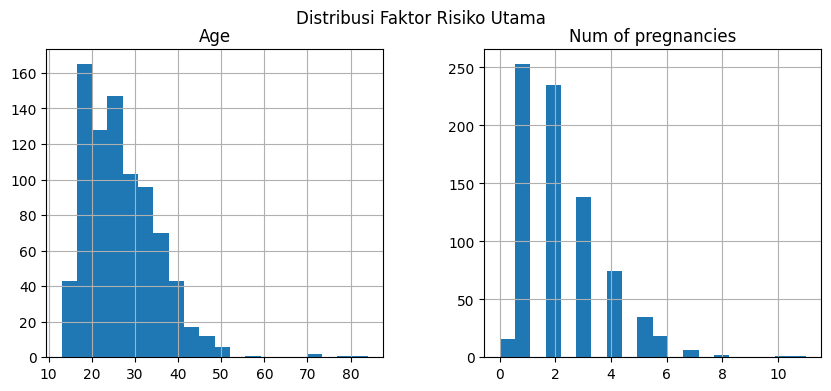

In [5]:
# CEK KONSISTENSI USIA
inconsistent_age = df[df['First sexual intercourse'] < (df['Age'] - 10)]
print(f"Data tidak logis: {len(inconsistent_age)} baris\n") 

# FITUR DENGAN VARIANSI NOL
zero_var_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Fitur tanpa variasi:", zero_var_cols)

# PLOT DISTRIBUSI FITUR KUNCI
df[['Age', 'Num of pregnancies']].hist(bins=20, figsize=(10,4))
plt.suptitle('Distribusi Faktor Risiko Utama')
plt.show()

#### 2.3. Explore Data

**Fokus EDA untuk Penelitian**:  
1. **Analisis Target** (`Biopsy`):  
   - Korelasi dengan tes skrining lain (`Hinselmann`, `Citology`) → validasi konsistensi label.  
2. **Analisis Faktor Dominan**:  
   - Uji hipotesis: "Pasien dengan `STDs:HPV`=1 dan `Hormonal Contraceptives`=1 memiliki risiko kanker 5x lebih tinggi".  
3. **Analisis Data Tidak Seimbang**:  
   - Stratifikasi: Distribusi `Age` dan `Number of pregnancies` pada kelompok `Biopsy=1` vs `Biopsy=0`.  

**Visualisasi Esensial**:  
| **Visualisasi** | **Fitur**                            | **Insight yang Dicari**                          |  
|-----------------|--------------------------------------|--------------------------------------------------|  
| Pie Chart       | `Biopsy`                             | Proporsi kelas positif/negatif                   |  
| Violin Plot     | `Age` vs `Biopsy`                    | Distribusi usia pasien kanker vs non-kanker      |  
| Correlation Map | `STDs*`, `Hormonal*`, `Biopsy`       | Kekuatan hubungan faktor risiko dengan kanker    |  
| Stacked Bar     | `STDs:HPV` & `Hormonal Contraceptives`| Efek interaksi pada risiko kanker               |  

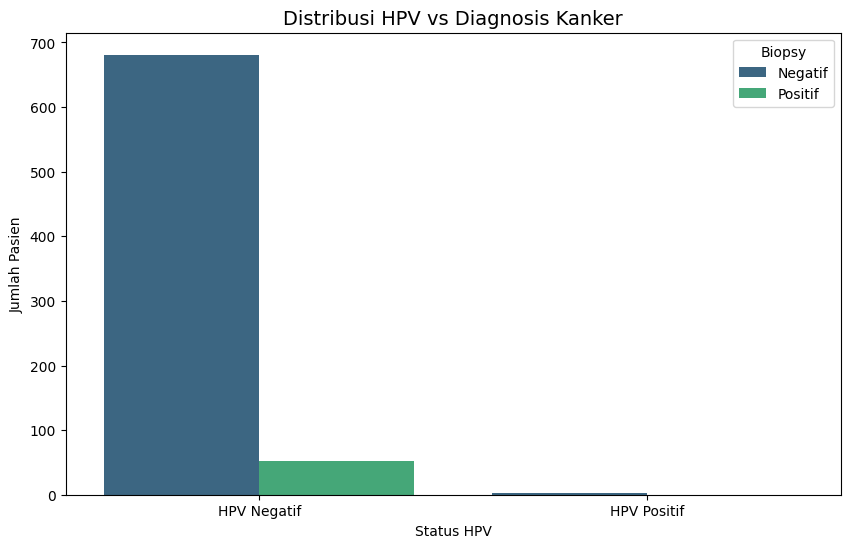

Risiko kanker pada HPV+: 0.0%
Risiko kanker pada HPV-: 7.1%


In [6]:
# Analisis HPV vs Biopsy
plt.figure(figsize=(10, 6))
sns.countplot(x='STDs:HPV', hue='Biopsy', data=df, palette='viridis')
plt.title('Distribusi HPV vs Diagnosis Kanker', fontsize=14)
plt.xlabel('Status HPV')
plt.ylabel('Jumlah Pasien')
plt.xticks([0, 1], ['HPV Negatif', 'HPV Positif'])
plt.legend(title='Biopsy', labels=['Negatif', 'Positif'])
plt.show()

# Hitung risiko relatif
hpv_cancer = df.groupby('STDs:HPV')['Biopsy'].mean()
print(f"Risiko kanker pada HPV+: {hpv_cancer[1]*100:.1f}%")
print(f"Risiko kanker pada HPV-: {hpv_cancer[0]*100:.1f}%")

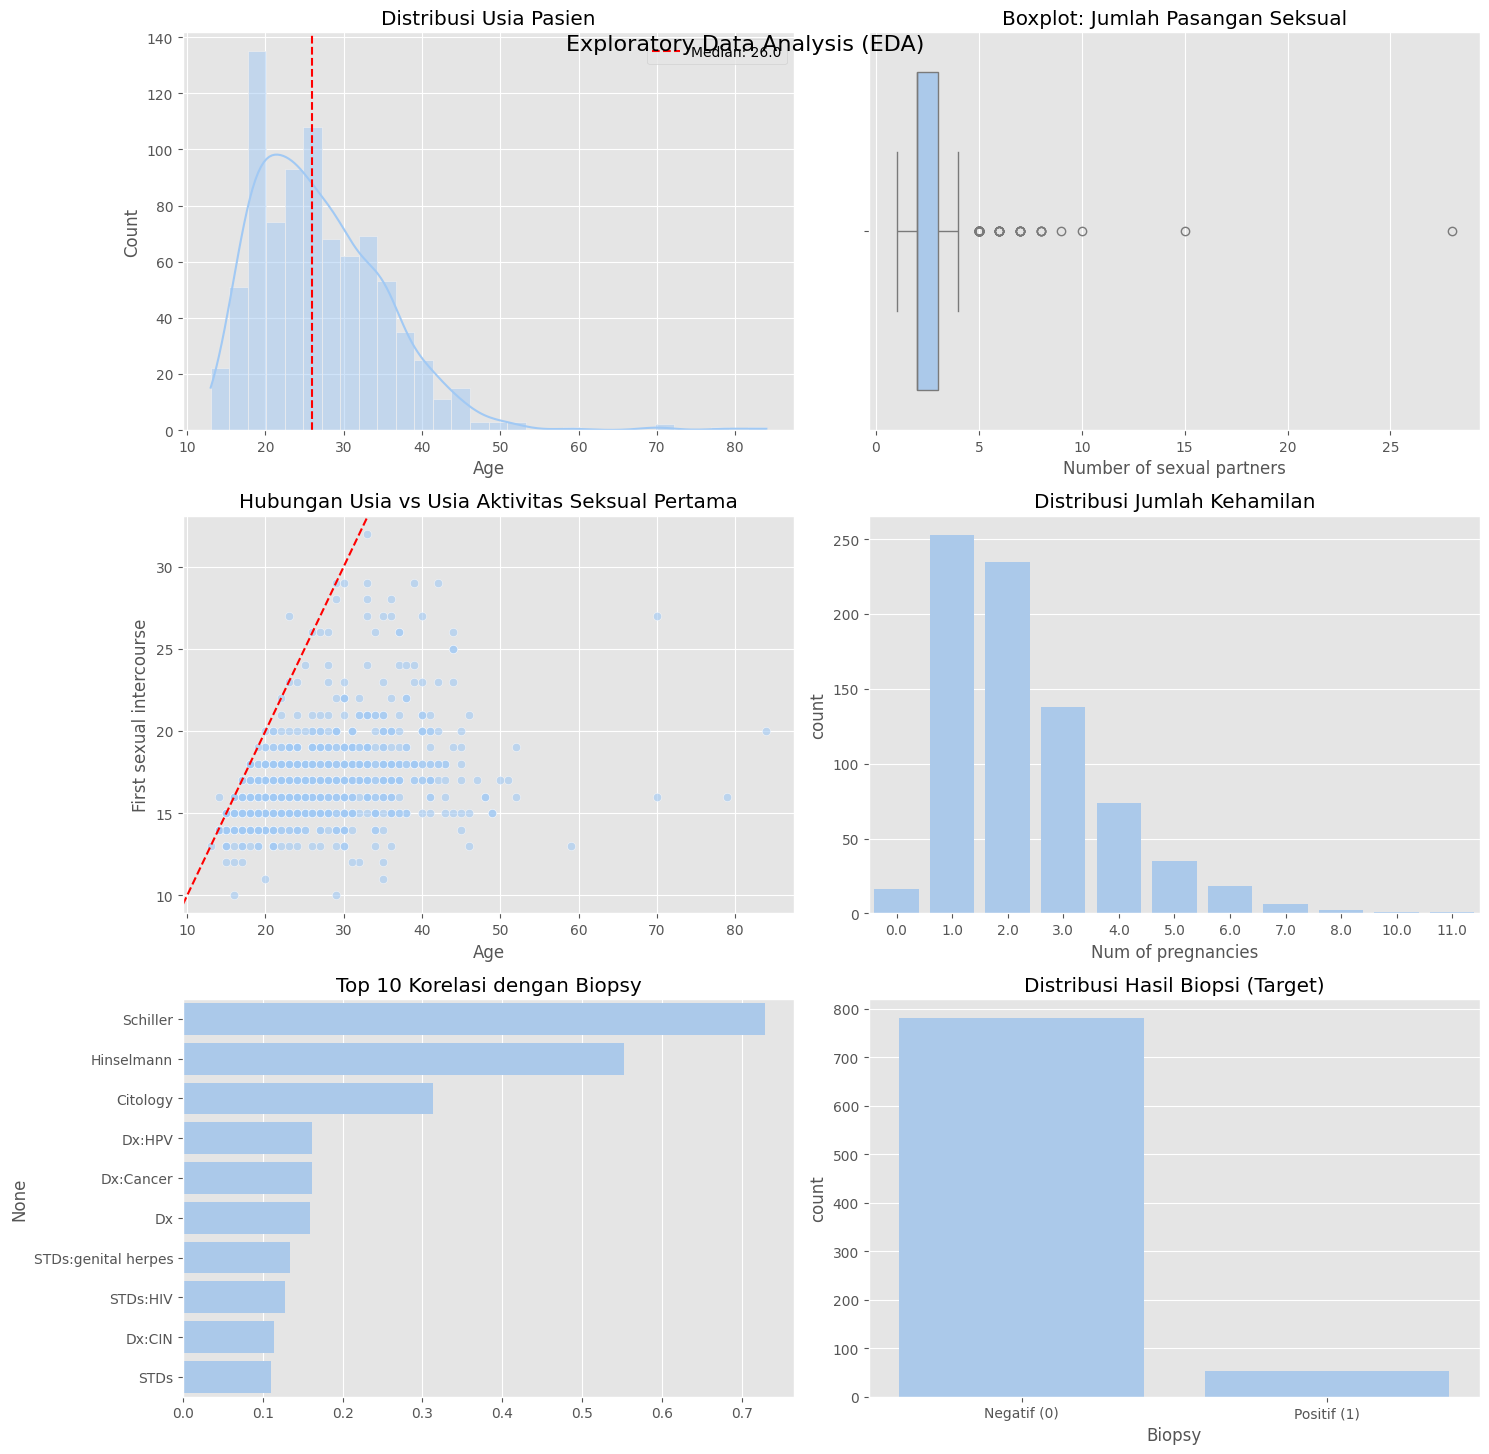

In [7]:
# Konfigurasi plot
plt.style.use('ggplot')
sns.set_palette('pastel')
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.suptitle('Exploratory Data Analysis (EDA)', fontsize=16, y=0.95)

# Plot 1: Distribusi Usia
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Usia Pasien')
axes[0, 0].axvline(df['Age'].median(), color='r', linestyle='--', label=f'Median: {df["Age"].median()}')
axes[0, 0].legend()

# Plot 2: Distribusi Jumlah Pasangan Seksual
sns.boxplot(x=df['Number of sexual partners'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot: Jumlah Pasangan Seksual')

# Plot 3: Hubungan Usia vs Aktivitas Seksual Pertama
sns.scatterplot(x='Age', y='First sexual intercourse', data=df, alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Hubungan Usia vs Usia Aktivitas Seksual Pertama')
axes[1, 0].axline((15, 15), slope=1, color='r', linestyle='--')

# Plot 4: Distribusi Kehamilan
sns.countplot(x='Num of pregnancies', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Jumlah Kehamilan')

# Plot 5: Korelasi dengan Target
corr_with_target = df.corr()['Biopsy'].sort_values(ascending=False)[1:11]
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, ax=axes[2, 0])
axes[2, 0].set_title('Top 10 Korelasi dengan Biopsy')

# Plot 6: Distribusi Kelas Target
sns.countplot(x='Biopsy', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Distribusi Hasil Biopsi (Target)')
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(['Negatif (0)', 'Positif (1)'])

plt.tight_layout()
# plt.savefig('cervical_cancer_eda.png', dpi=300)
plt.show()

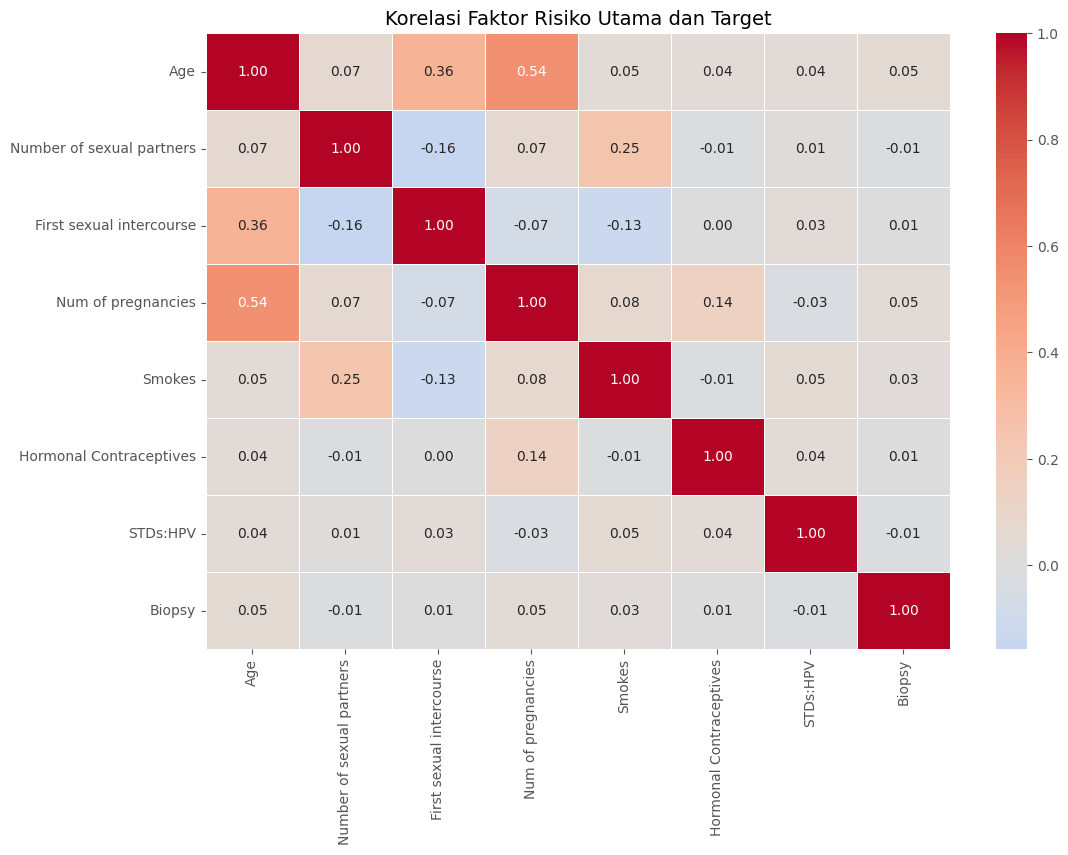

In [8]:
# Filter hanya fitur yang relevan (hindari leakage)
risk_features = [
    'Age', 'Number of sexual partners', 'First sexual intercourse', 
    'Num of pregnancies', 'Smokes', 'Hormonal Contraceptives',
    'STDs:HPV', 'Biopsy'
]

plt.figure(figsize=(12, 8))
corr_matrix = df[risk_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=.5)
plt.title('Korelasi Faktor Risiko Utama dan Target', fontsize=14)
plt.show()

#### 2.4. Verify Data Quality

**Identifikasi Masalah Kualitas Data**:  
| **Masalah**          | **Fitur Terdampak**                          | **Tingkat Keparahan** | **Penyebab Potensial**            |  
|----------------------|---------------------------------------------|----------------------|-----------------------------------|  
| **Missing Value**    | `Hormonal Contraceptives` (12.3%)           | Tinggi               | Pasien menolak jawab              |  
|                      | `Num of pregnancies` (6.7%)                 | Sedang               | Data tidak tercatat               |  
| **Outlier**          | `Number of sexual partners` (max=28)        | Kritis               | Kesalahan input/data langka       |  
|                      | `Smokes (packs/year)` (max=37)              | Sedang               | Konsumsi rokok ekstrem            |  
| **Inkonsistensi**    | `Smokes`=0 tapi `Smokes (years)`>0          | Minor                | Kesalahan pengisian formulir     |  
| **Variansi Nol**     | `STDs:AIDS` (semua nilai=0)                 | Tinggi               | Fitur tidak informatif           |  

**Langkah Validasi**:  
1. **Missing Value Analysis**:  
   - Cek pola missing value: Apakah sistematis (e.g., pasien STD tertentu cenderung kosong)?  
2. **Outlier Treatment**:  
   - Gunakan IQR (Interquartile Range) untuk deteksi outlier:  
     - Batas bawah: `Q1 - 1.5*IQR`  
     - Batas atas: `Q3 + 1.5*IQR`  
   - Contoh: Untuk `Number of sexual partners`, jika Q1=1, Q3=4 → IQR=3 → Batas atas= 4 + 4.5 = 8.5 → Nilai >8.5 dianggap outlier.  
3. **Konsistensi Temporal**:  
   - Filter tidak logis: `First sexual intercourse` < `Age` - 8 (batas biologis pubertas dini).
   - Formula:  
     ```python
     valid_mask = df['First sexual intercourse'] >= (df['Age'] - 8)
     ```
4. **Kredibilitas Outlier**:  
   - Nilai ekstrem `Number of sexual partners=28` pada pasien 18 tahun:  
     - Jika dikonfirmasi kesalahan input: imputasi median  
     - Jika valid: pertahankan sebagai *high-risk group* spesial 

In [9]:
# Analisis Missing Values
# print(f"Jumlah Missing Values per Kolom:\n{df.isnull().sum()}")
print("Analisis Missing Values:")
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
print(missing_pct)

Analisis Missing Values:
STDs: Time since last diagnosis       91.497006
STDs: Time since first diagnosis      91.497006
IUD                                   13.413174
IUD (years)                           13.413174
Hormonal Contraceptives               12.335329
Hormonal Contraceptives (years)       12.335329
STDs:vulvo-perineal condylomatosis    11.976048
STDs:HPV                              11.976048
STDs:Hepatitis B                      11.976048
STDs:HIV                              11.976048
STDs:AIDS                             11.976048
STDs:molluscum contagiosum            11.976048
STDs:genital herpes                   11.976048
STDs:pelvic inflammatory disease      11.976048
STDs:syphilis                         11.976048
STDs:cervical condylomatosis          11.976048
STDs:vaginal condylomatosis           11.976048
STDs:condylomatosis                   11.976048
STDs (number)                         11.976048
STDs                                  11.976048
Num of pregnanc

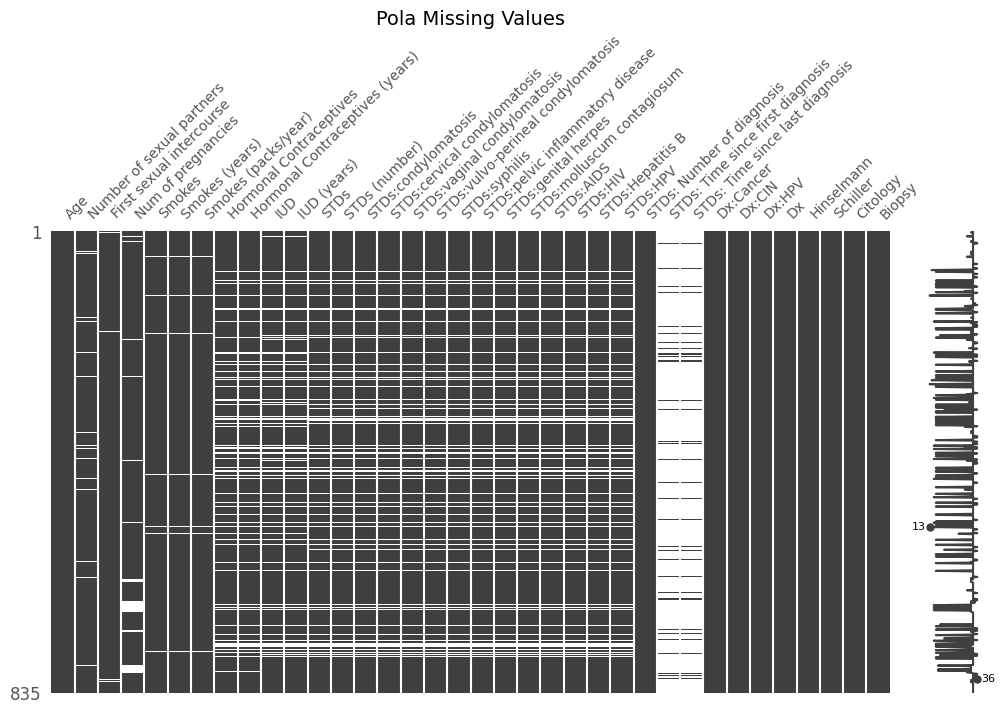

In [10]:
# Visualisasi Missing Values
msno.matrix(df, figsize=(12, 6), fontsize=10)
plt.title('Pola Missing Values', fontsize=14)
# plt.savefig('missing_values_pattern.png', dpi=300)
plt.show()

In [11]:
# Deteksi Outlier
print("Analisis Outlier (IQR Method):")
outlier_report = pd.DataFrame()

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].nunique() > 5:  # Hanya untuk fitur kontinu
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_pct = (len(outliers) / len(df)) * 100
        
        outlier_report = pd.concat([outlier_report, pd.DataFrame({
            'feature': [col],
            'outlier_count': [len(outliers)],
            'outlier_pct': [f"{outlier_pct:.2f}%"],
            'min_value': [df[col].min()],
            'max_value': [df[col].max()],
            'iqr_lower': [lower_bound],
            'iqr_upper': [upper_bound]
        })])
        
print("Laporan Outlier:")
display(outlier_report.sort_values('outlier_pct', ascending=False))

Analisis Outlier (IQR Method):
Laporan Outlier:


,feature,outlier_count,outlier_pct,min_value,max_value,iqr_lower,iqr_upper
0,IUD (years),83,9.94%,0.0,19.0,0.00,0.00
0,Number of sexual partners,68,8.14%,1.0,28.0,0.50,4.50
0,Hormonal Contraceptives (years),68,8.14%,0.0,30.0,-4.50,7.50
0,First sexual intercourse,41,4.91%,10.0,32.0,10.50,22.50
0,Smokes (years),123,14.73%,0.0,37.0,0.00,0.00
0,Smokes (packs/year),123,14.73%,0.0,37.0,0.00,0.00
0,Age,11,1.32%,13.0,84.0,4.50,48.50
0,Num of pregnancies,10,1.20%,0.0,11.0,-2.00,6.00
0,STDs: Time since last diagnosis,9,1.08%,1.0,22.0,-6.25,15.75
0,STDs: Time since first diagnosis,6,0.72%,1.0,22.0,-7.00,17.00


In [12]:
# Validasi Konsistensi Logis
print("✅ Validasi Konsistensi Logis:")
inconsistencies = []

# 1. Usia aktivitas seksual > usia saat ini
age_sex_inconsistent = df[df['First sexual intercourse'] > df['Age']]
if not age_sex_inconsistent.empty:
    inconsistencies.append(f"Usia seks pertama > usia saat ini: {len(age_sex_inconsistent)} kasus")

# 2. Perokok tapi tidak ada data lama merokok
smoke_inconsistent = df[(df['Smokes'] == 1) & 
                        ((df['Smokes (years)'].isna()) | 
                         (df['Smokes (packs/year)'].isna()))]
if not smoke_inconsistent.empty:
    inconsistencies.append(f"Data merokok tidak lengkap: {len(smoke_inconsistent)} kasus")

# 3. Hamil tapi tidak ada data kehamilan
pregnancy_inconsistent = df[(df['Num of pregnancies'] == 0) & 
                           (df['Age'] > 25) & 
                           (df['First sexual intercourse'] < 20)]
if not pregnancy_inconsistent.empty:
    inconsistencies.append(f"Potensi data kehamilan hilang: {len(pregnancy_inconsistent)} kasus")

# Tampilkan hasil validasi
if inconsistencies:
    for issue in inconsistencies:
        print(f"⚠️ {issue}")
else:
    print("✅ Tidak ditemukan inkonsistensi logis utama")

✅ Validasi Konsistensi Logis:
⚠️ Usia seks pertama > usia saat ini: 2 kasus
⚠️ Potensi data kehamilan hilang: 6 kasus


### 3. Data Preparation

In [13]:
# import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

In [14]:

drop_columns = [
    'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
    'STDs:condylomatosis', 'STDs:cervical condylomatosis', 
    'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 
    'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
    'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
    'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
    'Schiller', 'Hinselmann', 'Citology',  # Tambahan: tes diagnostik untuk hindari leakage
    'STDs: Number of diagnosis'  # Redundan
]
df_clean = df.drop(columns=drop_columns)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              835 non-null    int64  
 1   Number of sexual partners        810 non-null    float64
 2   First sexual intercourse         828 non-null    float64
 3   Num of pregnancies               779 non-null    float64
 4   Smokes                           822 non-null    float64
 5   Smokes (years)                   822 non-null    float64
 6   Smokes (packs/year)              822 non-null    float64
 7   Hormonal Contraceptives          732 non-null    float64
 8   Hormonal Contraceptives (years)  732 non-null    float64
 9   IUD                              723 non-null    float64
 10  IUD (years)                      723 non-null    float64
 11  STDs                             735 non-null    float64
 12  STDs (number)         

#### 3.1. Data Cleaning

1. **Penghapusan Kolom Redundan**  
   - 23 kolom dihapus karena:  
     - Missing value ekstrem (>90% kosong)  
     - Variansi sangat rendah (nilai konstan)  
     - Risiko data leakage (kolom diagnostik seperti `Schiller`, `Hinselmann`)  
     - Redundansi (`STDs: Number of diagnosis` duplikat dengan `STDs (number)`)  

2. **Penanganan Missing Values**  
   - **Pendekatan 2 Lapis**:  
     - Kolom dengan <5% missing value diisi dengan median  
       (Contoh: `Smokes`, `First sexual intercourse`)  
     - Kolom dengan >5% missing value diimputasi menggunakan `IterativeImputer`  
       (Model regresi multivariat untuk `Hormonal Contraceptives`, `STDs`, dll)  

3. **Penanganan Outlier**  
   - Metode **Winsorizing** dengan batas IQR (Interquartile Range):  
     - Batas atas = Q3 + 3*IQR  
     - Diterapkan khusus pada:  
       - `Number of sexual partners` (nilai >8 di-cap)  
       - `Smokes (years)` (nilai ekstrem dibatasi)  

4. **Koreksi Inkonsistensi Logis**  
   - Filter biologis:  
     ```python
     df_clean = df_clean[
         (df_clean['First sexual intercourse'] >= 10) & 
         (df_clean['First sexual intercourse'] <= df_clean['Age'] - 6)
     ]
     ```  
   - Konsistensi data merokok:  
     Jika `Smokes (years) > 0` maka `Smokes` di-set ke 1  

5. **Penghapusan Duplikat**  
   - Identifikasi dan hapus record identik seluruhnya  

In [15]:
# 1. Imputasi Missing Values <5%
low_missing_cols = ['First sexual intercourse', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)']
df_clean[low_missing_cols] = df_clean[low_missing_cols].fillna(df_clean[low_missing_cols].median())

high_missing_cols = ['Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 
                     'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'Num of pregnancies']

imputer = IterativeImputer(random_state=42)
df_clean[high_missing_cols] = imputer.fit_transform(df_clean[high_missing_cols])

# 2. Penanganan Outlier
def winsorize_column(series, n=3):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - n*iqr
    upper_bound = q3 + n*iqr
    return series.clip(lower_bound, upper_bound)

df_clean['Number of sexual partners'] = winsorize_column(df_clean['Number of sexual partners'], n=3)
df_clean['Smokes (years)'] = winsorize_column(df_clean['Smokes (years)'], n=3)

# 3. Perbaikan Inkonsistensi
# Konsistensi data merokok
df_clean.loc[df_clean['Smokes (years)'] > 0, 'Smokes'] = 1

# 4. Filter lebih longgar untuk inkonsistensi usia (REVISI PENTING)
# Hanya hapus data yang benar-benar tidak logis
df_clean = df_clean[
    (df_clean['First sexual intercourse'] >= 10) & 
    (df_clean['First sexual intercourse'] <= df_clean['Age'])  # Batas atas = usia saat ini
]

# 5. Tambahkan flag untuk inkonsistensi ringan (REVISI BARU)
df_clean['Age_Sex_Inconsistency'] = np.where(
    df_clean['First sexual intercourse'] > df_clean['Age'] - 5, 
    1, 
    0
)

# 5. Hapus duplikat
df_clean = df_clean.drop_duplicates()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 0 to 834
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              828 non-null    int64  
 1   Number of sexual partners        803 non-null    float64
 2   First sexual intercourse         828 non-null    float64
 3   Num of pregnancies               828 non-null    float64
 4   Smokes                           828 non-null    float64
 5   Smokes (years)                   828 non-null    float64
 6   Smokes (packs/year)              828 non-null    float64
 7   Hormonal Contraceptives          828 non-null    float64
 8   Hormonal Contraceptives (years)  828 non-null    float64
 9   IUD                              828 non-null    float64
 10  IUD (years)                      828 non-null    float64
 11  STDs                             828 non-null    float64
 12  STDs (number)              

#### 3.2 Data Transformation

In [16]:
# 1. Fitur rekayasa baru yang lebih valid (REVISI)
df_clean['Usia_Aktivitas_Dini'] = (df_clean['First sexual intercourse'] < 16).astype(int)
df_clean['Parity_Risk'] = df_clean['Num of pregnancies'] * (df_clean['Age'] - df_clean['First sexual intercourse'])

In [17]:
# Transformasi untuk Naive Bayes: Konversi numerik ke kategorikal
def categorize_age(age):
    if age < 25: return 'Muda'
    elif 25 <= age <= 40: return 'Dewasa'
    else: return 'Tua'

def categorize_partners(partners):
    if partners <= 2: return 'Sedikit'
    elif 3 <= partners <= 5: return 'Sedang'
    else: return 'Banyak'

def categorize_intercourse(age):
    if age <= 16: return 'Sangat Muda'
    elif 17 <= age <= 20: return 'Muda'
    else: return 'Dewasa'

def categorize_pregnancies(num):
    if num <= 1: return 'Rendah'
    elif 2 <= num <= 4: return 'Sedang'
    else: return 'Tinggi'

In [18]:
# 3. Terapkan fungsi kategorisasi
df_clean['Age_Cat'] = df_clean['Age'].apply(categorize_age)
df_clean['Partners_Cat'] = df_clean['Number of sexual partners'].apply(categorize_partners)
df_clean['Intercourse_Cat'] = df_clean['First sexual intercourse'].apply(categorize_intercourse)
df_clean['Pregnancies_Cat'] = df_clean['Num of pregnancies'].apply(categorize_pregnancies)

# 4. Normalisasi untuk ANN
numerical_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 
                 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
                 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
                 'Parity_Risk']  # Tambahkan fitur rekayasa baru

scaler = MinMaxScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

In [19]:
# Gunakan STDs umum sebagai proxy HPV
df_clean['STDs_Kontrasepsi_Risiko'] = df_clean['STDs'] * df_clean['Hormonal Contraceptives']

# Gunakan jumlah diagnosis STD
df_clean['STDsNumber_Kontrasepsi'] = df_clean['STDs (number)'] * df_clean['Hormonal Contraceptives']

# Fitur aktivitas seksual dini tetap valid
df_clean['Usia_Aktivitas_Dini'] = (df_clean['First sexual intercourse'] < 16).astype(int)

# Transformasi untuk ANN: Normalisasi fitur numerik
numerical_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 
                 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
                 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)']

scaler = MinMaxScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# Terapkan fungsi kategorisasi
df_clean['Age_Cat'] = df_clean['Age'].apply(categorize_age)
df_clean['Partners_Cat'] = df_clean['Number of sexual partners'].apply(categorize_partners)
df_clean['Intercourse_Cat'] = df_clean['First sexual intercourse'].apply(categorize_intercourse)
df_clean['Pregnancies_Cat'] = df_clean['Num of pregnancies'].apply(categorize_pregnancies)

#### 3.3 Data Integration

#### 3.4 Data Reduction

In [ ]:
# Kolom untuk Naive Bayes (kategorikal)
nb_columns = [
    'Age_Cat', 'Partners_Cat', 'Intercourse_Cat', 'Pregnancies_Cat',
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 
    'Usia_Aktivitas_Dini', 'Age_Sex_Inconsistency', 'Biopsy'  # Tambahkan flag inkonsistensi
]

# Kolom untuk ANN (numerik)
ann_columns = [
    'Age', 'Number of sexual partners', 'First sexual intercourse',
    'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
    'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)',
    'STDs', 'STDs (number)', 'Parity_Risk', 'Usia_Aktivitas_Dini', 'Age_Sex_Inconsistency', 'Biopsy'
]

# Membuat dataset khusus untuk masing-masing model
df_nb = df_clean[nb_columns].copy()
df_ann = df_clean[ann_columns].copy()

# Validasi Final
print("=== Dataset untuk Naive Bayes ===")
print(f"Shape: {df_nb.shape}")
print("Fitur:", df_nb.columns.tolist())
print("Distribusi Target:")
print(df_nb['Biopsy'].value_counts(normalize=True))

print("\n=== Dataset untuk ANN ===")
print(f"Shape: {df_ann.shape}")
print("Fitur:", df_ann.columns.tolist())
print("Distribusi Target:")
print(df_ann['Biopsy'].value_counts(normalize=True))

# Simpan dataset
df_nb.to_csv('cervical_cancer_nb_ready.csv', index=False)
df_ann.to_csv('KK-UAS/data/cervical_cancer_ann_ready.csv', index=False)

=== Dataset untuk Naive Bayes ===
Shape: (828, 11)
Fitur: ['Age_Cat', 'Partners_Cat', 'Intercourse_Cat', 'Pregnancies_Cat', 'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'Usia_Aktivitas_Dini', 'Age_Sex_Inconsistency', 'Biopsy']
Distribusi Target:
Biopsy
0    0.934783
1    0.065217
Name: proportion, dtype: float64

=== Dataset untuk ANN ===
Shape: (828, 17)
Fitur: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'Parity_Risk', 'Usia_Aktivitas_Dini', 'Age_Sex_Inconsistency', 'Biopsy']
Distribusi Target:
Biopsy
0    0.934783
1    0.065217
Name: proportion, dtype: float64


### 4. Modeling

In [21]:
import shap
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tensorflow.keras.losses import BinaryFocalCrossentropy # type: ignore

#### 4.1. Modeling Techniques

In [23]:
# Muat dataset yang sudah dipreprocessing
df_nb = pd.read_csv('KK-UAS/data/cervical_cancer_nb_ready.csv')
df_ann = pd.read_csv('KK-UAS/data/cervical_cancer_ann_ready.csv')

# Konfigurasi dasar untuk kedua model
RANDOM_STATE = 42
TEST_SIZE = 0.15
VAL_SIZE = 0.1765  # 15% dari 85% = 15/(100-15) ≈ 0.1765
TARGET = 'Biopsy'

# Fungsi evaluasi dasar
def evaluate_model(y_true, y_pred, y_proba=None):
    metrics = {
        'Recall': recall_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_proba) if y_proba is not None else None
    }
    return metrics


#### 4.2. Build Models

In [24]:
# Persiapan data untuk Naive Bayes
X_nb = df_nb.drop(columns=[TARGET])
y_nb = df_nb[TARGET]

# One-hot encoding untuk fitur kategorikal
X_nb = pd.get_dummies(X_nb)

# Pembagian dataset NB
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, y_nb, test_size=TEST_SIZE, stratify=y_nb, random_state=RANDOM_STATE
)
X_train_nb, X_val_nb, y_train_nb, y_val_nb = train_test_split(
    X_train_nb, y_train_nb, test_size=VAL_SIZE, stratify=y_train_nb, random_state=RANDOM_STATE
)

# Bangun model Naive Bayes dasar
nb_model = GaussianNB(var_smoothing=1e-9)
nb_model.fit(X_train_nb, y_train_nb)

GaussianNB()

In [25]:
# Persiapan data untuk ANN
X_ann = df_ann.drop(columns=[TARGET])
y_ann = df_ann[TARGET]

# Pembagian dataset ANN
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(
    X_ann, y_ann, test_size=TEST_SIZE, stratify=y_ann, random_state=RANDOM_STATE
)
X_train_ann, X_val_ann, y_train_ann, y_val_ann = train_test_split(
    X_train_ann, y_train_ann, test_size=VAL_SIZE, stratify=y_train_ann, random_state=RANDOM_STATE
)

# Bangun model ANN dasar
def create_ann_model(input_dim=16, lr=0.001):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss=BinaryFocalCrossentropy(gamma=2.0, alpha=0.25),
        metrics=[tf.keras.metrics.Recall(name='recall')]
    )
    return model

ann_model = create_ann_model(input_dim=X_train_ann.shape[1])
ann_model.summary()

# Pelatihan ANN dasar
history = ann_model.fit(
    X_train_ann, y_train_ann,
    epochs=200,
    batch_size=32,
    validation_data=(X_val_ann, y_val_ann),
    class_weight={0: 1, 1: 10},
    callbacks=[EarlyStopping(monitor='val_recall', patience=15, mode='max', restore_best_weights=True)],
    verbose=1
)

d:\GitHub\lecture-projects\Data-Mining\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2753 - recall: 0.1289 - val_loss: 0.1698 - val_recall: 0.0000e+00
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2865 - recall: 0.0000e+00 - val_loss: 0.1663 - val_recall: 0.0000e+00
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2489 - recall: 0.0000e+00 - val_loss: 0.1630 - val_recall: 0.0000e+00
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2675 - recall: 0.0000e+00 - val_loss: 0.1599 - val_recall: 0.0000e+00
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2443 - recall: 0.0000e+00 - val_loss: 0.1571 - val_recall: 0.0000e+00
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2734 - recall: 0.0000e+00 - val_loss: 0.1554 - val_recall: 0.0000e+00
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3178 - recall: 0.0000e+00 - val_loss: 0.1542 - val_recall: 0.0000e+00
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2660 - recall: 0.0000e+0

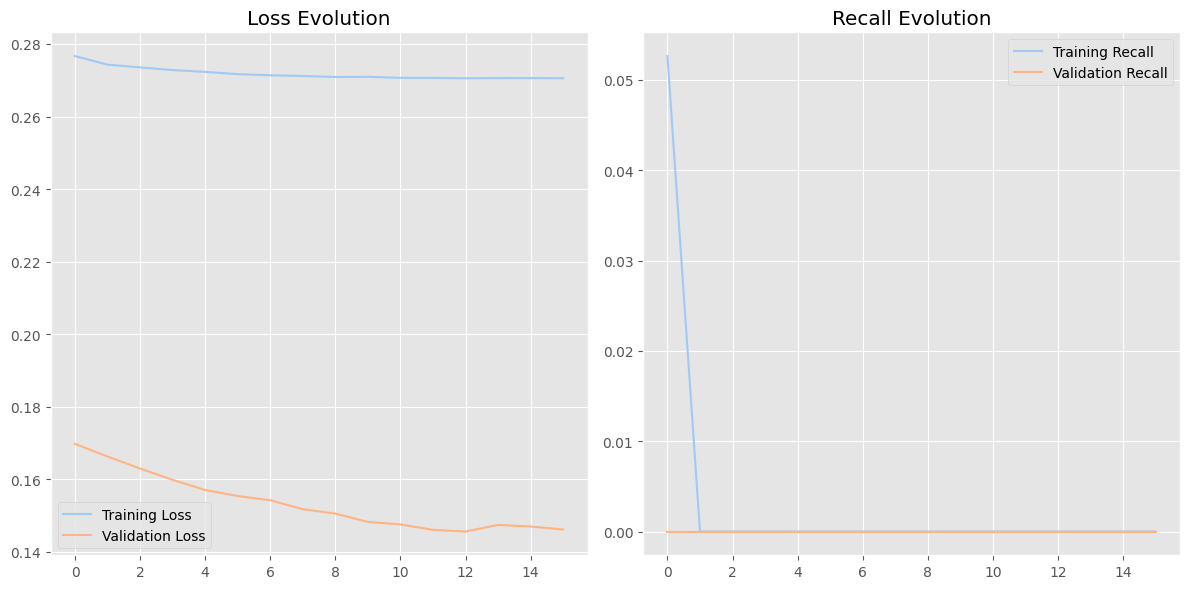

In [ ]:
# Plot learning curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Recall Evolution')
plt.legend()
plt.tight_layout()
plt.savefig('KK-UAS/models/img/learning_curve_initial.png', dpi=300)
plt.show()

#### 4.3. Tune Models

In [27]:
# Tuning Naive Bayes dengan GridSearchCV
nb_param_grid = {'var_smoothing': np.logspace(-10, -6, 20)}
nb_grid = GridSearchCV(
    GaussianNB(),
    param_grid=nb_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
    scoring='recall',
    n_jobs=-1
)
nb_grid.fit(X_train_nb, y_train_nb)
best_nb = nb_grid.best_estimator_

def ann_tuner(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=24, max_value=48, step=8),
        activation='relu',
        input_shape=(X_train_ann.shape[1],),
        kernel_initializer='he_normal'
    ))
    model.add(Dropout(
        rate=hp.Float('dropout_1', min_value=0.25, max_value=0.35, step=0.05)
    ))
    
    if hp.Boolean('second_layer'):
        model.add(Dense(
            units=hp.Int('units_2', min_value=16, max_value=32, step=8),
            activation='relu'
        ))
    
    model.add(Dense(1, activation='sigmoid'))
    
    lr = hp.Float('lr', min_value=3e-4, max_value=7e-4, sampling='log')
    gamma = hp.Float('gamma', min_value=1.8, max_value=2.2, step=0.1)
    
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss=BinaryFocalCrossentropy(gamma=gamma, alpha=0.25),
        metrics=[tf.keras.metrics.Recall(name='recall')]
    )
    return model

tuner = kt.BayesianOptimization(
    ann_tuner,
    objective=kt.Objective('val_recall', direction='max'),
    max_trials=30,
    overwrite=True,
    directory='KK-UAS/models/ann_tuning',
    project_name='cervical_cancer'
)

tuner.search(
    X_train_ann, y_train_ann,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_ann, y_val_ann),
    callbacks=[EarlyStopping(monitor='val_recall', patience=10, mode='max')],
    class_weight={0:1, 1:10}
)

# Dapatkan model terbaik
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_ann = tuner.hypermodel.build(best_hps)

# Latih model terbaik dengan lebih banyak epoch
best_ann.fit(
    X_train_ann, y_train_ann,
    epochs=200,
    batch_size=32,
    validation_data=(X_val_ann, y_val_ann),
    class_weight={0:1, 1:10},
    callbacks=[EarlyStopping(monitor='val_recall', patience=15, mode='max', restore_best_weights=True)],
    verbose=0
)

Trial 30 Complete [00h 00m 04s]
val_recall: 0.0

Best val_recall So Far: 1.0
Total elapsed time: 00h 02m 06s


d:\GitHub\lecture-projects\Data-Mining\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 4.4. Validate Models

In [ ]:
# Evaluasi model akhir pada test set
def full_evaluation(model, X_test, y_test, model_type='nb'):
    y_pred = model.predict(X_test)
    
    if model_type == 'ann':
        y_proba = model.predict(X_test).flatten()
        y_pred = (y_proba > 0.5).astype(int)
    else:
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
    
    # Metrics
    metrics = {
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    }
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {model_type.upper()}')
    plt.savefig(f'KK-UAS/models/img/confusion_matrix_{model_type}.png', dpi=300)
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_type.upper()} (AUC = {metrics["AUC"]:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.savefig(f'KK-UAS/models/img/roc_curve_{model_type}.png', dpi=300)
    plt.show()
    
    return metrics

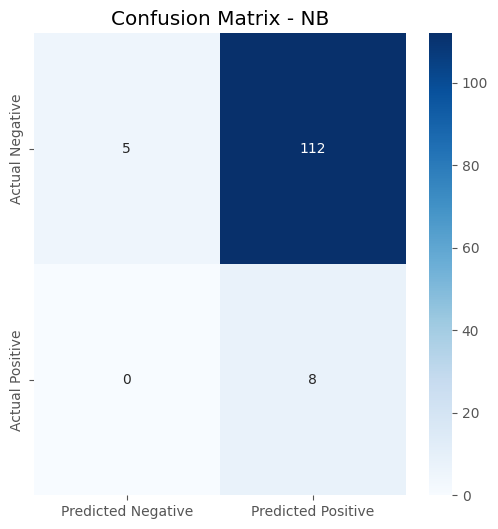

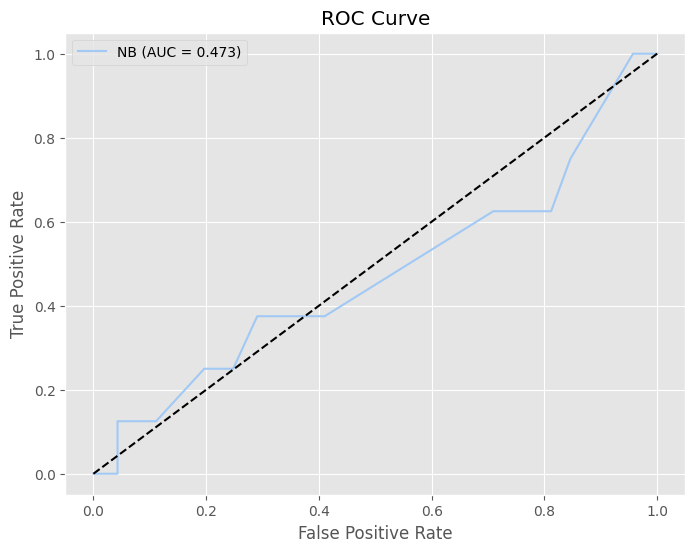

In [29]:
nb_metrics = full_evaluation(best_nb, X_test_nb, y_test_nb, 'nb')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


d:\GitHub\lecture-projects\Data-Mining\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


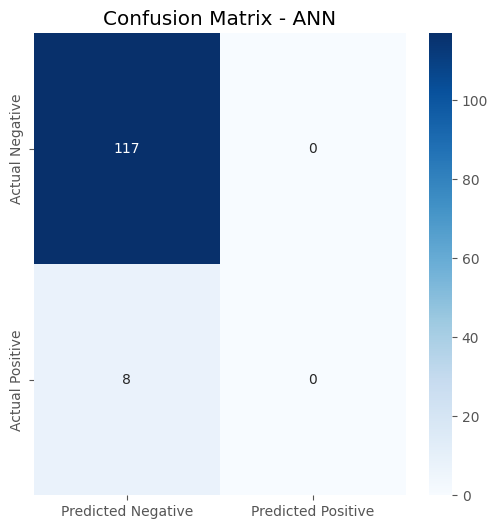

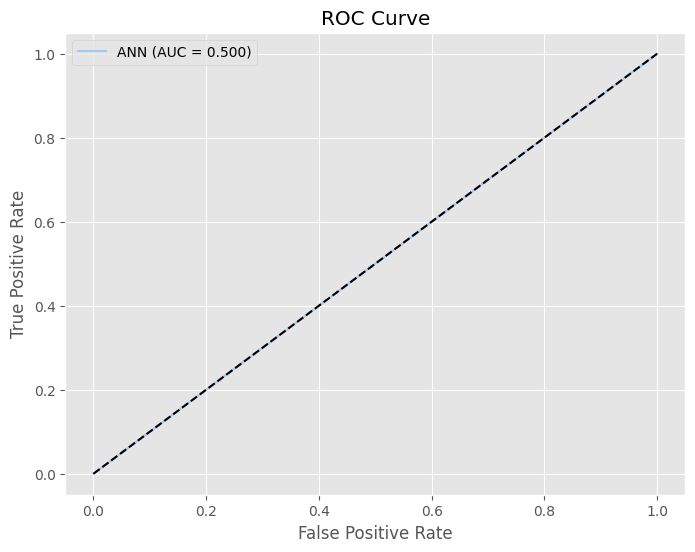

In [30]:
ann_metrics = full_evaluation(best_ann, X_test_ann, y_test_ann, 'ann')

In [31]:
# Validasi silang akhir
def cross_validate_model(model, X, y, model_type='nb'):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    recall_scores, auc_scores = [], []
    
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        if model_type == 'nb':
            model.fit(X_train, y_train)
            y_proba = model.predict_proba(X_test)[:, 1]
            y_pred = model.predict(X_test)
        else:
            model.fit(X_train, y_train, epochs=100, verbose=0)
            y_proba = model.predict(X_test).flatten()
            y_pred = (y_proba > 0.5).astype(int)
        
        recall_scores.append(recall_score(y_test, y_pred))
        auc_scores.append(roc_auc_score(y_test, y_proba))
    
    return {
        'Mean Recall': np.mean(recall_scores),
        'Recall Std': np.std(recall_scores),
        'Mean AUC': np.mean(auc_scores),
        'AUC Std': np.std(auc_scores)
    }

In [32]:
nb_cv = cross_validate_model(best_nb, X_nb, y_nb, 'nb')

In [33]:
ann_cv = cross_validate_model(best_ann, X_ann, y_ann, 'ann')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 0/125 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 5s 811us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 5s 742us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 5s 763us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 5s 733us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 5s 833us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 5s 822us/step
1/1 ━━━━━━━━━━━━

d:\GitHub\lecture-projects\Data-Mining\.venv\Lib\site-packages\shap\plots\_beeswarm.py:733: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim((slow, shigh))


<Figure size 1200x800 with 0 Axes>

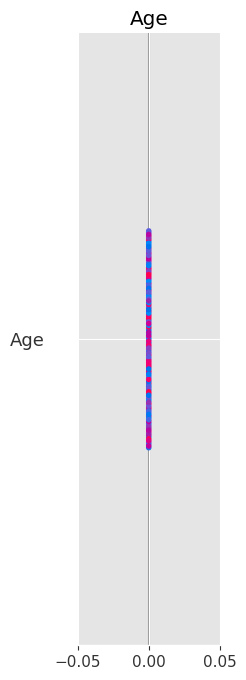

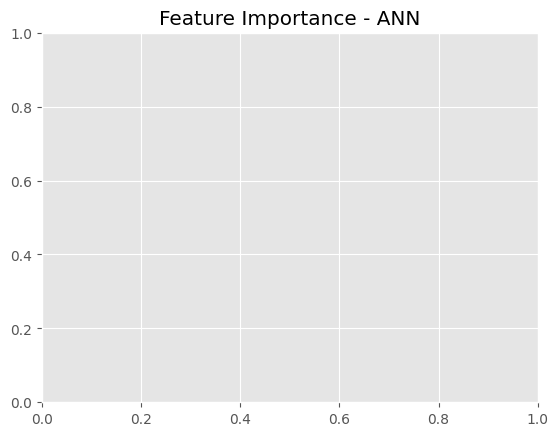

In [34]:
# SHAP Analysis untuk ANN
explainer = shap.KernelExplainer(best_ann.predict, shap.sample(X_train_ann, 100))
shap_values = explainer.shap_values(X_test_ann)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_ann, feature_names=X_ann.columns, plot_type='bar')
plt.title('Feature Importance - ANN')
plt.savefig('shap_feature_importance.png', dpi=300)
plt.show()

In [35]:
# Simpan hasil evaluasi
results = pd.DataFrame({
    'Metric': ['Recall', 'Precision', 'F1', 'AUC'],
    'Naive Bayes': [nb_metrics['Recall'], nb_metrics['Precision'], nb_metrics['F1'], nb_metrics['AUC']],
    'ANN': [ann_metrics['Recall'], ann_metrics['Precision'], ann_metrics['F1'], ann_metrics['AUC']]
})

cv_results = pd.DataFrame({
    'Metric': ['Mean Recall', 'Recall Std', 'Mean AUC', 'AUC Std'],
    'Naive Bayes': [nb_cv['Mean Recall'], nb_cv['Recall Std'], nb_cv['Mean AUC'], nb_cv['AUC Std']],
    'ANN': [ann_cv['Mean Recall'], ann_cv['Recall Std'], ann_cv['Mean AUC'], ann_cv['AUC Std']]
})

results.to_csv('KK-UAS/models/data/model_performance.csv', index=False)
cv_results.to_csv('KK-UAS/models/data/cross_validation_results.csv', index=False)

In [36]:
# Simpan model
joblib.dump(best_nb, 'KK-UAS/models/data/best_naive_bayes.pkl')
best_ann.save('KK-UAS/models/data/best_ann_model.h5')

print("✅ Modeling selesai! Hasil evaluasi:")
print(results)
print("\nHasil validasi silang:")
print(cv_results)

✅ Modeling selesai! Hasil evaluasi:
      Metric  Naive Bayes  ANN
0     Recall     1.000000  0.0
1  Precision     0.066667  0.0
2         F1     0.125000  0.0
3        AUC     0.472756  0.5

Hasil validasi silang:
        Metric  Naive Bayes  ANN
0  Mean Recall     0.312727  0.0
1   Recall Std     0.300611  0.0
2     Mean AUC     0.532667  0.5
3      AUC Std     0.111358  0.0


### 5. Evaluation

### 6. Deployment